In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine 
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
first_measure = session.query(Measurement).first()

In [8]:
inspector = inspect(engine)
inspector.get_columns('Measurement')

[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]

In [9]:
#check that there was data in the file
year1 = session.query(Measurement.date).order_by(Measurement.date.desc()).count()
year1

19550

In [26]:
#years_list = year1[0].split("-")
#prior_year = int(years_list [0])

In [27]:
#final_year = str(prior_year)+"-"+years_list[1]+"-"+years_list[2]

In [30]:
#query to find data/precipitation for the past year
precipitation_1 = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).filter(Measurement.date > "8/23/16")

In [31]:
#turn query to datafile in order to graph
precipitation_df = pd.read_sql_query(precipitation_1.statement, engine,index_col = 'date')
precipitation_df.head()

,prcp
date,


In [15]:
#create bar graph with dataframe
precipitation_df.plot.bar(x="date", y="prcp")
plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipition in Hawaii")

KeyError: 'date'

In [17]:
inspector.get_columns('Station')
#station_count = session.query(Station.station).group_by(Stations.station).count()

[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'name',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'latitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'longitude',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'elevation',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]

In [18]:
#find the station count using the a query
station_count = session.query(Station.station).group_by(Station.station).count()
station_count

9

In [19]:
#query to find the collected incident reports for all the stations
temperature_data = session.query(Station.station, Station.name, Measurement.station, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [20]:
#show temperature data
temperature_data

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [21]:
#find the most active station
active_station = temperature_data[0]

In [24]:
# the number of reports from the most active station
station_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == active_station[0], Measurement.date > "8/23/16").all()
station_data

[]

In [23]:
len(station_data)

0

In [25]:
#create histogram from temperature data query
station_weather = [x[1] for x in active_station]
plt.hist(station_weather, bins=12, color='R')
plt.title("Temperature Observation for Waihee Station")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
labels = ['tobs']
plt.legend(labels)

TypeError: 'int' object is not subscriptable

In [26]:
#create function for temperature analysis 
def temp_func(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    low_temp = min(temperatures)
    high_temp = max(temperatures)
    
    plt.figure
    plt.bar(1, avg_temp, yerr=(high_temp - low_temp), tick_label='')
    plt.ylabel("Temperature")
    plt.title("Average Trip Temperature")
    plt.show()

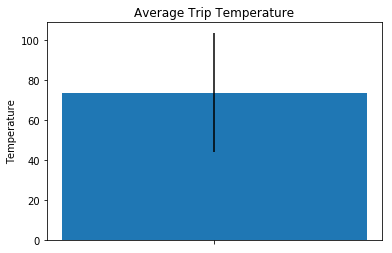

In [27]:
temp_func(start="2015-01-01", end="2016-01-01")